# Big Mart Data Analysis

#### This file Contains Findings on the Raw Data of the Big Mart Data. Which was provided by the  Kaggle.com

## - import Dependencis Libraries

In [1]:
import pandas as pan
import numpy as nump
import matplotlib.pyplot as plt
import session_info as sess

## - Read raw Data

In [2]:
BMData = pan.read_csv("Train.csv")
BMData.count()

Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

## - Transform the DataFrame

In [3]:
# fill the null
#BMData['Item_Weight'] =  BMData['Item_Weight'].fillna(value = BMData['Item_Weight'].mean())
BMData['Item_Fat_Content'] =  BMData['Item_Fat_Content'].fillna(value = 'Not Defined')
BMData['Item_Visibility'] =  BMData['Item_Visibility'].fillna(value = 0.0)
BMData['Item_Type'] =  BMData['Item_Type'].fillna(value = 'Not Defined')
BMData['Item_MRP'] =  BMData['Item_MRP'].fillna(value = 0.0)
BMData['Outlet_Identifier'] =  BMData['Outlet_Identifier'].fillna(value = 'Not Assigned')
BMData['Outlet_Establishment_Year'] =  BMData['Outlet_Establishment_Year'].fillna(value = 'Not Available')
BMData['Outlet_Size'] =  BMData['Outlet_Size'].fillna(value = 'Not Defined')
BMData['Outlet_Location_Type'] =  BMData['Outlet_Location_Type'].fillna(value = 'Not Defined')
BMData['Outlet_Type'] =  BMData['Outlet_Type'].fillna(value = 'Not Defined')
BMData['Item_Outlet_Sales'] =  BMData['Item_Outlet_Sales'].fillna(value = 0.0)
# drop the null if all column is null
BMData = BMData.dropna(how = 'all')

## - Finding the Outcomes

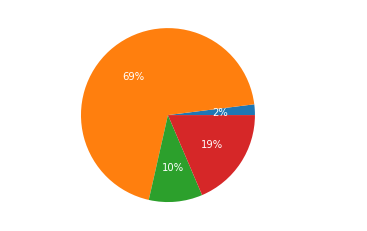

In [5]:
#Query1
Query1 = BMData.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().round(2)
labels = []
data = []
for i in BMData['Outlet_Type'].unique():
    labels.append(i)
#plt.pie(Query1, labels = labels,textprops={'color':"w"}, autopct='%1.2f%%')
plt.pie(Query1, labels = labels,textprops={'color':"w"}, autopct='%.0f%%')

plt.show()
#Query1['Item_Outlet_Sales']

In [6]:
#Query2
Query2 = BMData.groupby('Outlet_Identifier', as_index = False)['Item_Outlet_Sales'].sum().round(2)
Query2 = Query2[Query2['Item_Outlet_Sales'] == Query2['Item_Outlet_Sales'].max()]
display(Query2)

,Outlet_Identifier,Item_Outlet_Sales
5,OUT027,3453926.05


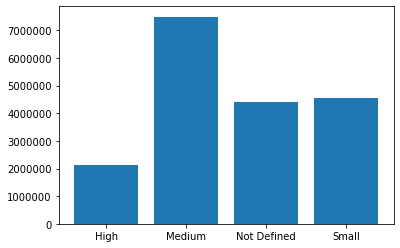

In [11]:
#Query3
Query3 = BMData.groupby('Outlet_Size', as_index = False)['Item_Outlet_Sales'].sum().round(2)
plt.bar(Query3['Outlet_Size'],Query3['Item_Outlet_Sales'])
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

In [12]:
#Query4
#Based on Counts
Query4 = BMData.groupby('Item_Type', as_index = False)['Item_Identifier'].count()
countwise_max = Query4[Query4['Item_Identifier'] == Query4['Item_Identifier'].min()]
countwise_min = Query4[Query4['Item_Identifier'] == Query4['Item_Identifier'].max()]
#Based on Sales
Query4 = BMData.groupby('Item_Type', as_index = False)['Item_Outlet_Sales'].sum().round(2)
saleswise_max = Query4[Query4['Item_Outlet_Sales'] == Query4['Item_Outlet_Sales'].min()]
saleswise_min = Query4[Query4['Item_Outlet_Sales'] == Query4['Item_Outlet_Sales'].max()]
display(countwise_max)
display(countwise_min)
display(saleswise_max)
display(saleswise_min)

,Item_Type,Item_Identifier
12,Seafood,64


,Item_Type,Item_Identifier
6,Fruits and Vegetables,1232


,Item_Type,Item_Outlet_Sales
12,Seafood,148868.22


,Item_Type,Item_Outlet_Sales
6,Fruits and Vegetables,2820059.82


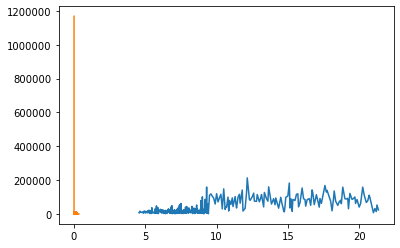

In [13]:
#Query5
Query5 = BMData.groupby('Item_Weight', as_index = False)['Item_Outlet_Sales'].sum().round(2)
Query5['Item_Outlet_Sales'] = Query5['Item_Outlet_Sales'].round()
Query5a = BMData.groupby('Item_Visibility', as_index = False)['Item_Outlet_Sales'].sum().round(2)
#plt.show()
'''a = Query5['Item_Weight']
b = Query5['Item_Outlet_Sales'].round()
Query5.plot(a, b)'''
fig, ax = plt.subplots()
ax.plot(Query5['Item_Weight'],Query5['Item_Outlet_Sales'])
ax.plot(Query5a['Item_Visibility'],Query5a['Item_Outlet_Sales'])
plt.ticklabel_format(style = 'plain')

In [15]:
#Query6
max_mrp = BMData[BMData['Item_Outlet_Sales'] == BMData['Item_Outlet_Sales'].max()]
min_mrp = BMData[BMData['Item_Outlet_Sales'] == BMData['Item_Outlet_Sales'].min()]
min_mrp = min_mrp[min_mrp['Item_MRP'] == min_mrp['Item_MRP'].min()]
avg_mrp = (int(max_mrp['Item_MRP']) + int(min_mrp['Item_MRP']))/2
print('The average MRP')
display(avg_mrp)
display(max_mrp[['Item_Type','Item_MRP']])
display(min_mrp[['Item_Type','Item_MRP']])


The average MRP


133.0

,Item_Type,Item_MRP
7188,Household,234.9958


,Item_Type,Item_MRP
906,Soft Drinks,32.89


In [16]:
#Query7
for i in BMData['Item_Type'].unique():
    t1 = BMData[BMData['Item_Type'] == i].groupby('Outlet_Location_Type', as_index = False)['Item_Outlet_Sales'].sum().round()
    t1 = t1.assign(item_type = i)
    t1 = t1[t1['Item_Outlet_Sales'] == t1['Item_Outlet_Sales'].max()]
    display(t1)



,Outlet_Location_Type,Item_Outlet_Sales,item_type
2,Tier 3,626010.0,Dairy


,Outlet_Location_Type,Item_Outlet_Sales,item_type
2,Tier 3,360993.0,Soft Drinks


,Outlet_Location_Type,Item_Outlet_Sales,item_type
2,Tier 3,419725.0,Meat


,Outlet_Location_Type,Item_Outlet_Sales,item_type
2,Tier 3,1205575.0,Fruits and Vegetables


,Outlet_Location_Type,Item_Outlet_Sales,item_type
2,Tier 3,848163.0,Household


,Outlet_Location_Type,Item_Outlet_Sales,item_type
2,Tier 3,505646.0,Baking Goods


,Outlet_Location_Type,Item_Outlet_Sales,item_type
2,Tier 3,1126992.0,Snack Foods


,Outlet_Location_Type,Item_Outlet_Sales,item_type
2,Tier 3,721511.0,Frozen Foods


,Outlet_Location_Type,Item_Outlet_Sales,item_type
2,Tier 3,104365.0,Breakfast


,Outlet_Location_Type,Item_Outlet_Sales,item_type
2,Tier 3,440636.0,Health and Hygiene


,Outlet_Location_Type,Item_Outlet_Sales,item_type
2,Tier 3,186833.0,Hard Drinks


,Outlet_Location_Type,Item_Outlet_Sales,item_type
2,Tier 3,570584.0,Canned


,Outlet_Location_Type,Item_Outlet_Sales,item_type
2,Tier 3,224799.0,Breads


,Outlet_Location_Type,Item_Outlet_Sales,item_type
1,Tier 2,140186.0,Starchy Foods


,Outlet_Location_Type,Item_Outlet_Sales,item_type
2,Tier 3,116081.0,Others


,Outlet_Location_Type,Item_Outlet_Sales,item_type
1,Tier 2,59319.0,Seafood


In [43]:
#Query8
final = pan.DataFrame(columns = ['item_type','max_tier_city'])
temp_data = BMData['Item_Type'].unique()
for i in temp_data:
    t1 = BMData[BMData['Item_Type'] == i].groupby('Outlet_Location_Type', as_index = False)['Item_Outlet_Sales'].sum().round()
    t2 = t1[t1['Outlet_Location_Type'] == 'Tier 2']
    t3 = t1[t1['Outlet_Location_Type'] == 'Tier 3']
    result = pan.DataFrame(columns = ['item_type','max_tier_city'])
    if float(t2['Item_Outlet_Sales']) >= float(t3['Item_Outlet_Sales']):
        result['max_tier_city'] = t2['Outlet_Location_Type']
        result['item_type'] = i
        final = final.append(result)
    elif float(t2['Item_Outlet_Sales']) <= float(t3['Item_Outlet_Sales']):
        result['max_tier_city'] = t3['Outlet_Location_Type']
        result['item_type'] = i 
        final = final.append(result)
    else:
        print('both Tier 2 and Tier 3 have equal sales')
display(final)

,item_type,max_tier_city
2,Dairy,Tier 3
2,Soft Drinks,Tier 3
2,Meat,Tier 3
2,Fruits and Vegetables,Tier 3
2,Household,Tier 3
2,Baking Goods,Tier 3
2,Snack Foods,Tier 3
2,Frozen Foods,Tier 3
2,Breakfast,Tier 3
2,Health and Hygiene,Tier 3
